<a id='pose_questions'></a>
## Titanic Analysis


In [ ]:
#Importing packages
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import sklearn
import seaborn as sns

In [ ]:
#Reading the dataset
titanic = pd.read_csv('/content/titanic_data.csv')

In [ ]:
# Setting the index
titanic.set_index('PassengerId', inplace=True)

In [ ]:
#datacleaning
Titanic = titanic.fillna(titanic.mean())
Titanic

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S


**1.  AVERAGE AGE OF THE PASSENGERS**

In [ ]:
#average age of passengers on ship
avg_age = Titanic["Age"].mean()
avg_age

29.69911764705882

The mean age of all passengers on the ship is 29.7years. So, the average age is 29years, 7months.

**2.  NUMBER OF MALE AND FEMALE PASSENGERS ON THE SHIP**

Text(0.5, 1.0, 'Number of male and female passengers on the ship')

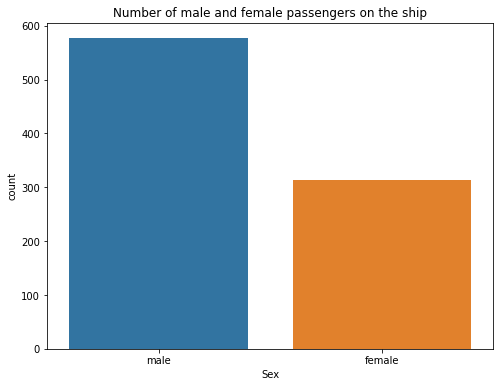

In [ ]:
# Plotting number of male and female
plt.figure(figsize=(8,6))
sns.countplot(x='Sex', data=Titanic)
plt.title('Number of male and female passengers on the ship')

There are a total of 577 males and 314 female passengers on the ship.

The bar chart here shows that there are a total of 577 males and 314 females, showing that there are more male passengers than females.

**3.  PERCENTAGE OF MALE AND FEMALE ON THE SHIP**

Text(0.5, 1.0, 'Percentage of male and female on the ship')

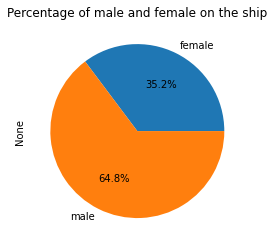

In [ ]:
#Creating a variable Titanic_count for the number male and female on the ship
Titanic_count = Titanic.groupby('Sex').size()
#percentage of male and female
Titanic_count.plot(kind='pie', autopct="%1.1f%%")
plt.title("Percentage of male and female on the ship")

The pie chart shows that we have 68.8% male passengers and 35.2% female passengers, further confirming the bar chart above.

**4.  NUMBER OF TEENAGERS ONBOARD**

In [ ]:
# First, we have to group the age into categories to get the teenagers.
# This will be done by creating a new column(Age_group) on the dataframe
# To assign an age_group to all the ages
Titanic.loc[Titanic['Age']<13, 'Age_group'] = 'Child'
Titanic.loc[Titanic['Age'].between(13,19), 'Age_group'] = 'Teenager'
Titanic.loc[Titanic['Age']>19, 'Age_group'] = 'Adult'

Text(0.5, 1.0, 'Number of teenagers on the ship')

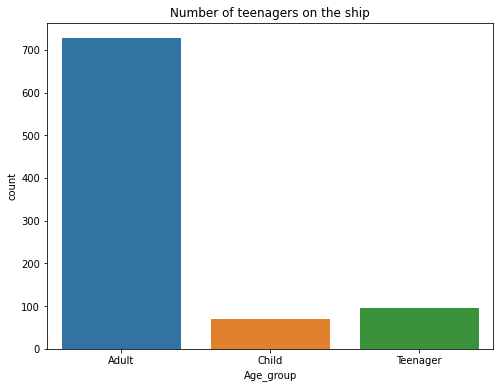

In [ ]:
#plotting count of each demography
plt.figure(figsize=(8,6))
sns.countplot(x='Age_group', data=Titanic)
plt.title('Number of teenagers on the ship')

There were a total of seven-hundred and twenty seven(727) adults, ninety-five(95) teenagers and sixety-nine (69) children on the ship.

**5.  AVERAGE FARE OF THE TRIP**

In [ ]:
#Average total of the fare
avg_fare_trip = Titanic["Fare"].mean()
avg_fare_trip

32.204207968574636

The average fare of the trip is 32.20 pounds

**6. AVERAGE FARE FOR EACH CLASS OF TICKET**

In [ ]:
# Count of passengers on each class
Titanic.groupby(['Pclass']).size()

Pclass
1    216
2    184
3    491
dtype: int64

More people were in the third class than the other classes.

In [ ]:
#filtering the dataset to only when class is first class
first_class = Titanic.query(('Pclass == 1'
                                     ))

#What was the average fare for a first class ticket?
avg_fare_fc = first_class["Fare"].mean()
avg_fare_fc

84.1546875

For the first class tickets, the average fare is 84.15 pounds

In [ ]:
#filtering the dataset to only when class is second class
second_class = Titanic.query(('Pclass == 2'
                                     ))

#What was the average fare for a first class ticket?
avg_fare_sc = second_class["Fare"].mean()
avg_fare_sc

20.662183152173913

In [ ]:
#filtering the dataset to only when class is third class
third_class = Titanic.query(('Pclass == 3'
                                     ))

#What was the average fare for a first class ticket?
avg_fare_tc = third_class["Fare"].mean()
avg_fare_tc

13.675550101832993

The average fare for the first class is higher than second and third class even though there were less number of first class passengers

**7. PCLASS AND AGE GROUP THAT SURVIVED THE MOST**

Text(0.5, 1.0, 'Survival rate by Age_group')

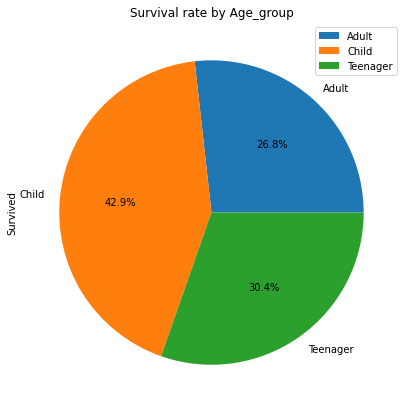

In [ ]:
#Create a pivot table using the Age_group as index
table = pd.pivot_table(data=Titanic,index=['Age_group'])

#show the visualization that survived the most in a piechart
table.plot.pie(y='Survived', figsize=(7,7), autopct="%1.1f%%")
plt.title('Survival rate by Age_group')

From the above visualization, children survived the most with approximately 58% of survival rate.

Text(0.5, 1.0, 'Survival rate by class')

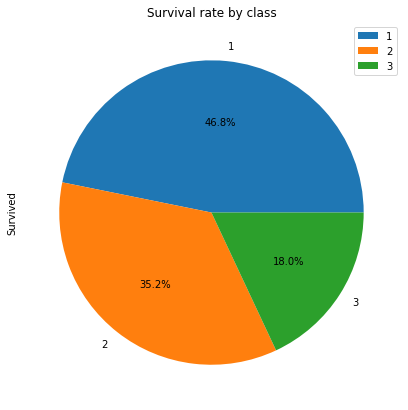

In [ ]:
# Making a pivot table
table1 = pd.pivot_table(data=Titanic,index=['Pclass'])

#show the visualization that survived the most in a piechart
table1.plot.pie(y='Survived', figsize=(7,7), autopct="%1.1f%%")
plt.title('Survival rate by class')

Passengers in the first class survived more than passengers in second and third class.

In [ ]:
#Number of male and female in each class
group= Titanic.groupby(['Pclass', 'Sex']).size()
group

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
dtype: int64

**8.  PERCENTAGE OF THE POPULATION WITH SIBLINGS OR SPOUSES**

In [ ]:
#Find the total number of passengers where sibsp is not 0
sibsp = Titanic.query(('`SibSp` > 0'
                        ))
#Using that value, divide it with the total population and multiply by 100 to get the percentage
sibsp
283/891*100

31.762065095398427

31.8% of the passengers had their siblings or spouses onboard

**CORRELATION BETWEEN THE PASSENGER'S AGE AND THE FARE THEY PAY**

In [ ]:
#Calculate for the correlation value
correlation = Titanic['Fare'].corr(Titanic['Age'])
correlation

0.0915660932850576

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


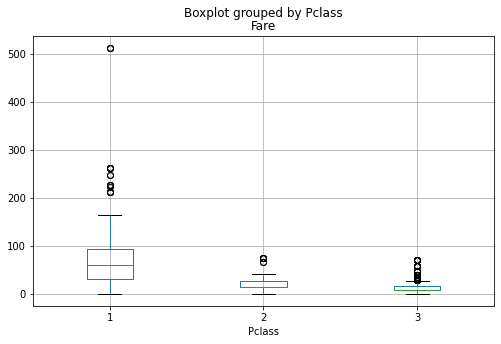

In [ ]:
#Use of boxplot to determine the correlation between Class and fare
Titanic.boxplot(column='Fare', by='Pclass', figsize=(8,5))

There is a correlation between Class and fare

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


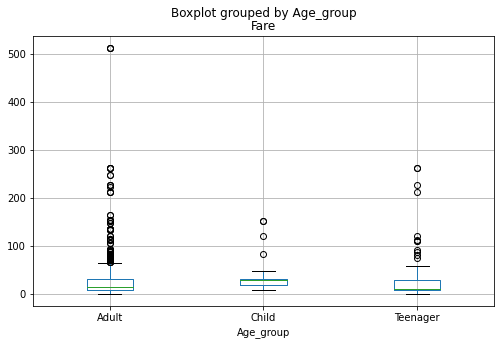

In [ ]:
#Using a boxplot to visualize the correlation
Titanic.boxplot(column='Fare', by='Age_group', figsize=(8,5))

Text(0, 0.5, 'Fare')

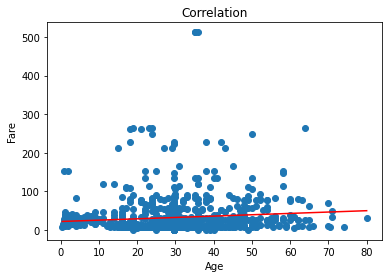

In [ ]:
# Visualizing the correlation with a scatter plot
plt.scatter(Titanic['Age'], Titanic['Fare'])
  
# This will fit the best line into the graph
plt.plot(np.unique(Titanic['Age']), np.poly1d(np.polyfit(Titanic['Age'], Titanic['Fare'], 1))
         (np.unique(Titanic['Age'])), color='red')

# adds the title
plt.title('Correlation')
# Labelling axes
plt.xlabel('Age')
plt.ylabel('Fare')


There is no correlation between fare and age

### Data Description
(from https://www.kaggle.com/c/titanic)

- **survival:** Survival (0 = No; 1 = Yes)
- **pclass:** Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- **name:** Name
- **sex:** Sex
- **age:** Age
- **sibsp:** Number of Siblings/Spouses Aboard
- **parch:** Number of Parents/Children Aboard
- **ticket:** Ticket Number
- **fare:** Passenger Fare
- **cabin:** Cabin
- **embarked:** Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

**Special Notes:**
- Pclass is a proxy for socio-economic status (SES) 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower
- Age is in Years; Fractional if Age less than One (1) If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch) some relations were ignored.  The following are the definitions used for sibsp and parch.

- **Sibling:**  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
- **Spouse:**   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
- **Parent:**   Mother or Father of Passenger Aboard Titanic
- **Child:**    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins, nephews/nieces, aunts/uncles, and in-laws.  Some children travelled only with a nanny, therefore parch=0 for them.  As well, some travelled with very close friends or neighbors in a village, however, the definitions do not support such relations.